In [1]:
from __future__ import print_function, division
%matplotlib inline
import first
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot

In [2]:
#my questions are; What is the relationship between position and assists numbers? Do positions any have effects number of assists?
# is there any relationship between runs and hits? do number of runs effect number of hits? 
mydata=pd.read_csv("Batting.csv")
mydata.head(40) # .head show that how many rows i wanna see

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#this shows the columns that i am going to use.  I am gonna have a look relationship between position and assists average
myspecificdata = mydata.loc[:,['playerID', 'R', 'H']]
myspecificdata

,playerID,R,H
0,abercda01,0,0
1,addybo01,30,32
2,allisar01,28,40
3,allisdo01,28,44
4,ansonca01,29,39
5,armstbo01,9,11
6,barkeal01,0,1
7,barnero01,66,63
8,barrebi01,1,1
9,barrofr01,13,13


In [4]:
#also .describe shows statistics about my data
myspecificdata.describe()

,R,H
count,102816.000000,102816.000000
mean,18.815544,37.139930
std,28.242983,52.603757
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,9.000000
75%,27.000000,58.000000
max,192.000000,262.000000


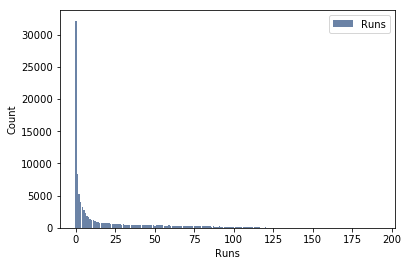

In [5]:
histogram = thinkstats2.Hist(myspecificdata.R, label='Runs')
thinkplot.Hist(histogram)
thinkplot.Config(xlabel='Runs', ylabel='Count',loc='upper right')


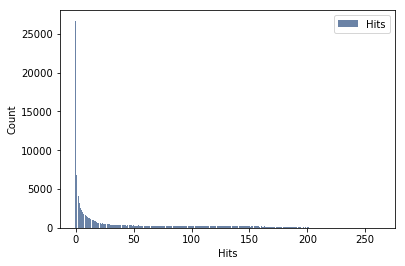

In [6]:
histogram2 = thinkstats2.Hist(myspecificdata.H, label='Hits')
thinkplot.Hist(histogram2)
thinkplot.Config(xlabel='Hits', ylabel='Count',loc='upper right')

In [7]:
#This gives us PMF(probability mass function)
n = histogram.Total()
pmf = histogram.Copy()
for x, freq in histogram.Items():
    histogram[x] = freq / n

histogram

Hist({0: 0.31304466230936817, 1: 0.081232492997198882, 2: 0.051635932150638032, 3: 0.038505680049797694, 4: 0.031921101774042948, 5: 0.026571739807033926, 6: 0.021932384064737007, 7: 0.017759881730469967, 8: 0.016057812013694366, 9: 0.013947245564892624, 10: 0.012459150326797386, 11: 0.011107220666044195, 12: 0.010455571117335824, 13: 0.0089869281045751627, 14: 0.0092884375972611261, 15: 0.0079559601618425149, 16: 0.0079462340491752263, 17: 0.0077517117958294428, 18: 0.0070319794584500469, 19: 0.0068082788671023969, 20: 0.0067693744164332402, 21: 0.0065164954870837221, 22: 0.0064386865857454095, 23: 0.0057481325863678809, 24: 0.0060788204170557116, 25: 0.0055438842203548088, 26: 0.0056605975723622781, 27: 0.0053493619670090262, 28: 0.0055244319950202301, 29: 0.0048630563336445687, 30: 0.0053007314036725801, 31: 0.0047949735449735447, 32: 0.0049408652349828821, 33: 0.0046393557422969188, 34: 0.004328120136943666, 35: 0.0043670245876128227, 36: 0.00439620292561469, 37: 0.0044740118269530

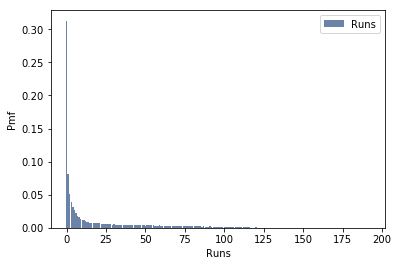

In [8]:
runs_pmf = thinkstats2.Pmf(histogram, label='Runs')
hits_pmf = thinkstats2.Pmf(histogram2, label='Hits')
thinkplot.Hist(runs_pmf)
thinkplot.Config(xlabel='Runs', ylabel='Pmf')

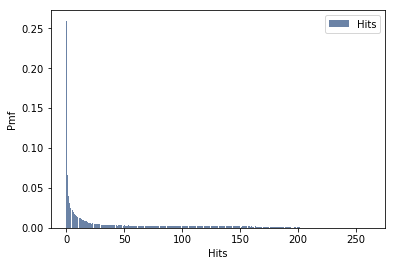

In [9]:
thinkplot.Hist(hits_pmf)
thinkplot.Config(xlabel='Hits', ylabel='Pmf')

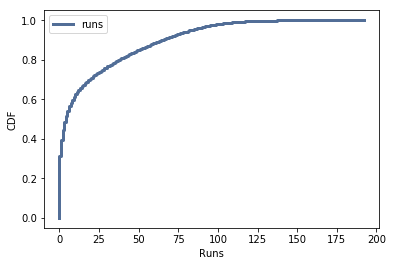

In [10]:
#these are CDF graphs for runs and hits.
runs_cdf = thinkstats2.Cdf(myspecificdata.R, label='runs')
thinkplot.Cdf(runs_cdf)
thinkplot.Config(xlabel='Runs', ylabel='CDF', loc='upper left')

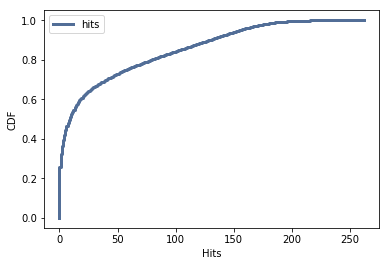

In [11]:
hits_cdf = thinkstats2.Cdf(myspecificdata.H, label='hits')
thinkplot.Cdf(hits_cdf)
thinkplot.Config(xlabel='Hits', ylabel='CDF', loc='upper left')

thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


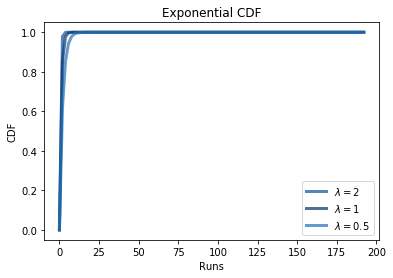

In [12]:
#now i am choosing Exponential distribution, because as we saw above my cdf graphs are exponential. so, we can observe it much easier.
thinkplot.PrePlot(1)
for lam in [2.0,1,0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam,myspecificdata.R.min(), myspecificdata.R.max())
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='Runs', ylabel='CDF', 
                 loc='lower right')

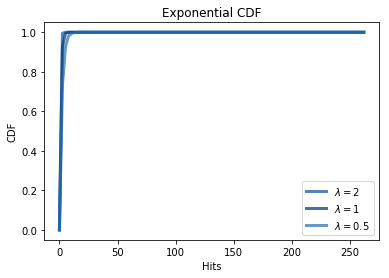

In [13]:
#now i am choosing Exponential distribution, because as we saw above my cdf graphs are exponential. so, we can observe it much easier.
thinkplot.PrePlot(1)
for lam in [2.0,1,0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam,myspecificdata.H.min(), myspecificdata.H.max())
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='Hits', ylabel='CDF', 
                 loc='lower right')

In [14]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [15]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [16]:
#it shows correlation between these two data (runs and hits)
Corr(myspecificdata.R, myspecificdata.H)

0.96743369053648909

In [17]:
#and as a last part of project is hypothesis testing. Then we will make sure they have really relation or not.
# my hypothesis is that if number of runs increase, then number of hits also go up.

In [21]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=2000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [24]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        myspecificdata.R, myspecificdata.H = data
        test_stat = abs(myspecificdata.R.std() - myspecificdata.H.std())
        return test_stat

    def MakeModel(self):
        myspecificdata.R, myspecificdata.H = self.data
        self.n, self.m = len(myspecificdata.R), len(myspecificdata.H)
        self.pool = np.hstack((myspecificdata.R, myspecificdata.H))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [28]:
data = myspecificdata.R, myspecificdata.H
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [29]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [30]:
data = myspecificdata.R, myspecificdata.H
correlationtest = CorrelationPermute(data)
pvalue = correlationtest.PValue()
pvalue

0.557

In [ ]:
#The reported p-value is 0, which means that in 2000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/10001/1000 , but it is not actually 0.
#To get a sense of how unexpected the observed value is under the null hypothesis, we can compare the actual correlation to the largest value we saw in the simulations.